In [241]:

import importlib
import experiment
importlib.reload(experiment)
import models
importlib.reload(models)
from experiment import *

In [242]:
exp_name = "protA-d1-FL_e3-fl"

from pathlib import Path
path = Path("./data/protA_DCP1-FL_EDC3-FL/protA_Dcp1_Edc3_final")
fs = sorted(list(path.glob("*.csv")))

controls_path = Path("./data/protA_DCP1-FL_EDC3-FL/protA_Dcp1_Edc3_final_refs")
controls_fs = sorted(list(controls_path.glob("*.csv")))
print(len(fs))
print(len(controls_fs))

12
6


In [243]:
concs = {5 : 25,
12 : 25,
7 : 50,
6 : 50,
1 : 100,
2 : 100,
9 : 200,
8 : 200,
4 : 400,
13 : 400,
10 : 800,
3 : 800}

Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <Axes: >)

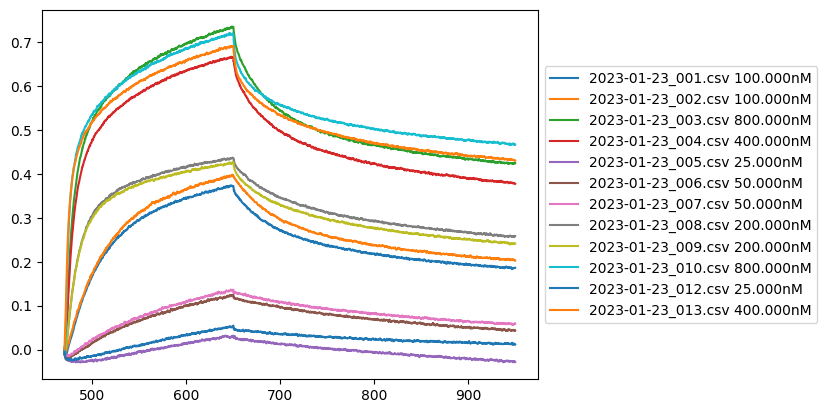

In [245]:
exp = Exp()
exp.load_bli_data(fs)
for c, ds in zip(concs, exp):
    idx = int(ds.name[-7:-4])
    ds.steps[0].concentration = concs[idx] * 1e-9
exp.interstep_correction()
exp.plot()


In [227]:
# controls = Exp()
# controls.load_bli_data(controls_fs)
# concs = [25, 50, 100, 200, 400, -1]
# for c, ds in zip(concs, controls):
#     ds.steps[0].concentration = c
# controls.interstep_correction()
# controls.plot()


In [228]:
# #load descriptions, need to copy from blitz
# desc = Path(f"./data/GST-D1-HLM_E3-FL_230105/dataset_description.txt")
# df = pd.read_csv(desc, sep='\t', index_col=0)
# df

In [229]:
# #assign concentrations from desc to each dataset
# concs = df['Conc. (uM)'].to_dict()
# analyze = df['Analyze'].to_dict()

# for ds in exp.datasets:
#     idx = ds.name[:-4].split('_')[-1]
#     idx=int(idx)
#     c = concs[idx]
#     if np.isnan(c): c=0
#     ds.steps[0].concentration = c*1e-6
#     ds.use_for_fit = analyze[idx]



Dataset(0, name = 2023-01-23_001.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(1, name = 2023-01-23_002.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(2, name = 2023-01-23_003.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(3, name = 2023-01-23_004.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(4, name = 2023-01-23_005.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(5, name = 2023-01-23_006.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(6, name = 2023-01-23_007.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(7, name = 2023-01-23_008.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit = True)
Dataset(8, name = 2023-01-23_009.csv, no_steps = 2, len = 949.8, baseline = (350.0, 470.0), use_for_fit 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

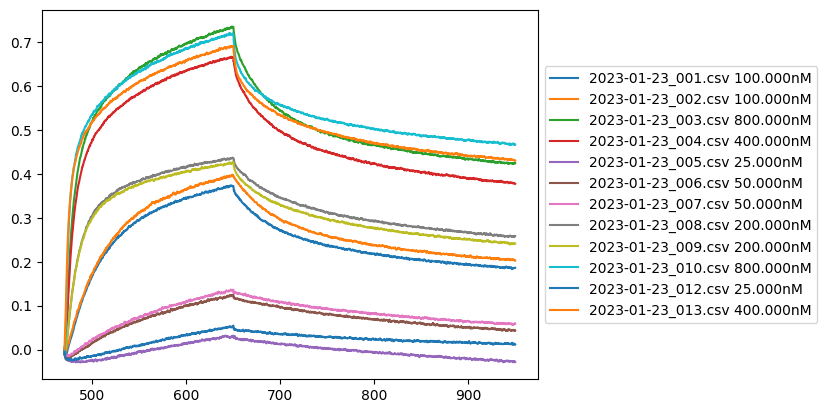

In [230]:
for ds in exp.datasets:
    print(ds)
exp.interstep_correction()
exp.plot()

In [231]:
# #assign conentrations to controls
# controls_c = [0.,0.2,0.4,0.8,1.6]
# controls_c = [c*1e-6 for c in controls_c]

# for ds, c in zip(controls, controls_c):
#     ds.steps[0].concentration = c




In [232]:
# controls_dict = {}
# for ds in controls:
#     control_mask = ds.t>=ds.steps[0].start
#     c = ds.steps[0].concentration
#     controls_dict[c] = ds.response[control_mask]

# #subtract controls from ds
# for ds in exp:
#     if not ds.use_for_fit: continue
#     print(ds.steps[0].concentration)
#     start = ds.steps[0].start
#     mask = ds.t>=start
#     r = ds.response[mask]
#     c = ds.steps[0].concentration
#     if c in controls_dict:
#         print('correcting c=',c)
#         ds.response[mask] = np.subtract(r, controls_dict[c])
        

# exp.plot()

In [233]:
exp.crop(3)
exp.interstep_correction()

Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <Axes: >)

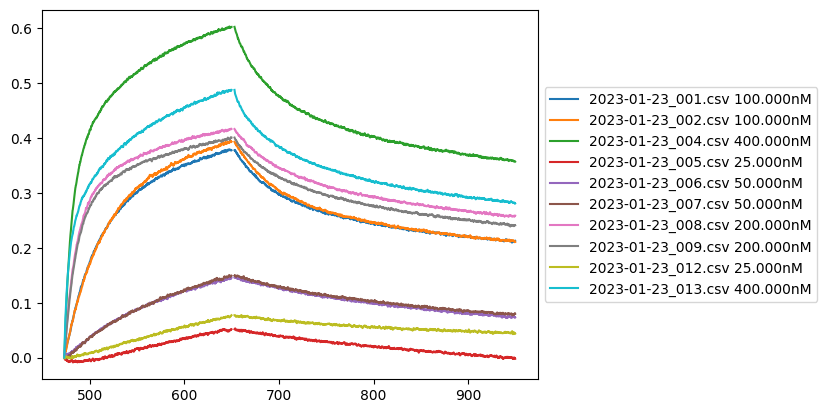

In [234]:
#remove some datasets
ds_to_remove = []
for ds in exp:
    if ds.steps[0].concentration == 800*1e-9:
        ds_to_remove.append(ds)
    else:
        ds.use_for_fit = True
for ds in ds_to_remove:
    exp.datasets.remove(ds)

exp.interstep_correction()
exp.plot()

In [235]:
exp.model = models.Bivalent_analyte()
exp.model.params_definitions

{'ka1': <Parameter 'ka1', value=10000.0, bounds=[10.0:100000000.0]>,
 'kd1': <Parameter 'kd1', value=0.01, bounds=[1e-06:0.1]>,
 'ka2': <Parameter 'ka2', value=0.01, bounds=[1e-07:10000000.0]>,
 'kd2': <Parameter 'kd2', value=0.01, bounds=[1e-07:10000000.0]>,
 'kt': <Parameter 'kt', value=10000000.0, bounds=[10.0:1000000000000.0]>,
 'ymax': <Parameter 'ymax', value=1, bounds=[0:1000]>,
 'offset': <Parameter 'offset', value=0, bounds=[-1000:1000]>}

In [236]:
# exp.model.params_definitions['ymax'].user_data['type']='global'

# exp.model.params_definitions['ymax1'].user_data['type']='global'
# exp.model.params_definitions['ymax2'].user_data['type']='global'
# exp.model.params_definitions['ymax3'].user_data['type']='global'
 
exp.create_params(offsets=0, mtl = 0)
exp.params


name,value,initial value,min,max,vary
ka1,10000.0000,10000.0,10.0000000,1.0000e+08,True
kd1,0.01000000,0.01,1.0000e-06,0.10000000,True
ka2,0.01000000,0.01,1.0000e-07,10000000.0,True
kd2,0.01000000,0.01,1.0000e-07,10000000.0,True
ymax_ds0,1.00000000,1,0.00000000,1000.00000,True
ymax_ds1,1.00000000,1,0.00000000,1000.00000,True
ymax_ds3,1.00000000,1,0.00000000,1000.00000,True
ymax_ds4,1.00000000,1,0.00000000,1000.00000,True
ymax_ds5,1.00000000,1,0.00000000,1000.00000,True
ymax_ds6,1.00000000,1,0.00000000,1000.00000,True


In [237]:
exp.fit_params()

Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 7 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 8 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 10 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 11 are not finite. LMFIT is set to omit

'`ftol` termination condition is satisfied.'

(<Figure size 640x480 with 1 Axes>, <Axes: >)

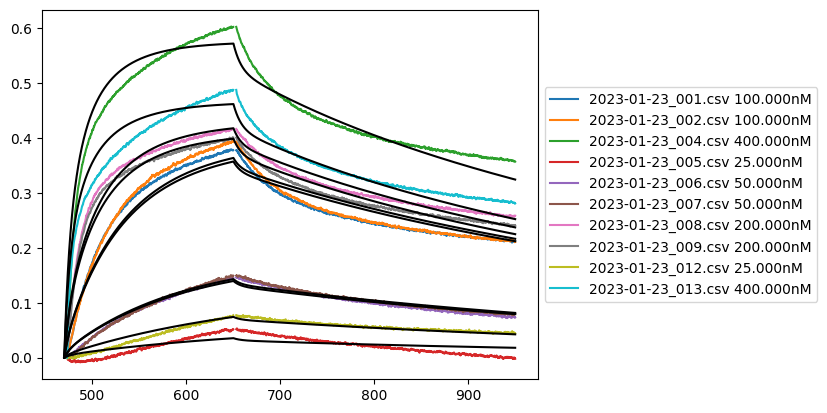

In [238]:
flag = False
for par in exp.params:
    if "offset" in par:
        flag=True

exp.plot(fit=True, correct_offsets=flag)

In [239]:
exp.result

In [240]:
import plotly.graph_objects as go

fig = go.Figure()

for ds in exp.datasets:
    if ds.use_for_fit == False: continue
    x = np.array([])
    y = np.array([])
    y_fit = np.array([])
    
    for step in ds.steps:
        # if step.concentration>0: color = 'orangered'
        # elif step.concentration==0: color = 'cornflowerBlue'
        # else: color = 'lightgrey'
        mask = (ds.t>=step.start) & (ds.t<step.stop)

        if f"offset_ds{ds.index}_step{step.index}" in exp.params:
                offset = exp.params[f'offset_ds{ds.index}_step{step.index}'].value
        else: 
            offset = 0

        
        x_step = ds.t[mask]
        y_step = ds.response[mask] - offset
        y_fit_step = ds.fit_response[mask] - offset

        x = np.concatenate([x, x_step])
        y = np.concatenate([y, y_step])
        y_fit = np.concatenate([y_fit, y_fit_step])

    
    x = x - x[0]
    fig.add_scatter(x = x, 
                    y = y_fit,
                    marker=dict(size=0, 
                            color='black',
                            line=dict(width=1, color='black')),
                    line=dict(
                         width=2, 
                         color='black'
                         ),
                    name=ds.steps[0].concentration,)

        

    fig.add_scatter(x = x,
                    y = y,
                    marker=dict(
                            size=0, 
                            #color=color, 
                            line=dict(
                                    width=0.1, 
                                    #color=color
                                    )),
                    line=dict(
                            width=1, 
                            #color=color
                            ),
                    name=f"{ds.index}_{ds.steps[0].concentration:.2e}",
                    )



fig.update_layout(
            height=600,
            width = 800,
            font_family="Arial",
            font_size = 24,
            showlegend=False,
            margin=dict(l=0,r=0,b=0,t=0,pad=0), 
            template='plotly_white',
            paper_bgcolor="rgb(255, 255, 255)",  
            plot_bgcolor="rgb(255, 255, 255)") 

fig.update_xaxes(
    ticklabelposition="inside top", 
    title='time [s]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    showgrid=False,
    mirror=True)

fig.update_yaxes(
    ticklabelposition="outside top", 
    title='Response [nm]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    showgrid=False,
    mirror=True)



fig.show()

In [220]:
for ds in exp:
    if ds.index in [4, 5, 1, 8, 3]:
        ds.use_for_fit = False
    if ds.index in []:
        ds.use_for_fit = True
    # if ds.steps[0].concentration==16e-6:
    #     ds.use_for_fit = True
[ds.index for ds in exp]



[0, 1, 3, 4, 5, 6, 7, 8, 10, 11]

In [180]:
for ds in exp:
    if ds.index in [4, 5, 1, 8, 3]:
        ds.use_for_fit = True

In [43]:
exp.crop(5)


In [45]:
import kaleido
fig.write_image(f'{exp_name}-{exp.model.name}.png')

In [46]:
from lmfit.printfuncs import fitreport_html_table
s = fitreport_html_table(exp.result, show_correl=True,  min_correl=0.1)

with open(f"{exp_name}.htm", 'w') as f: 
    f.write(s)


In [47]:
from uncertainties import ufloat
def get_html_report(show_correl=True):
    result = exp.result
    tables = result._repr_html_(show_correl=show_correl)
    
    if ('ka' in result.params) and ('kd' in result.params):
        t = []
        cell = lambda x, tag: f'<{tag}> {x} </{tag}>'
        
        has_er = hasattr(result.params['ka'], 'stderr') and (result.params['ka'].stderr is not None)

        if has_er:
            ka = ufloat(float(result.params['ka'].value), float(result.params['ka'].stderr))
            kd = ufloat(float(result.params['kd'].value), float(result.params['kd'].stderr))
            Kd = kd/ka
        else:
            Kd = result.params['kd'].value/result.params['ka'].value

        t.append('<h2>Dissociation constant</h2>')
        t.append('<table><tr>')
        t.append(cell(f"<b>Name</b>", 'td'))
        t.append(cell(f"<b>value</b>", 'td'))
        t.append(cell(f"<b>standard error</b>", 'td'))
        t.append(cell(f"<b>relative error</b>", 'td'))  
        t.append('</tr><tr>')
        t.append(cell(f"<b>Kd</b>", 'td'))
        if has_er:
            t.append(cell(f"{Kd.n:.5e}", 'td'))
            t.append(cell(f"{Kd.std_dev:.5e}", 'td'))
            t.append(cell(f"{Kd.std_dev/Kd.n:.2%}", 'td'))
        else:
            t.append(cell(f"{Kd:.5e}", 'td'))
            t.append(cell("NA", 'td'))
            t.append(cell("NA", 'td'))
        t.append('</table></tr></table>')

        return tables + ''.join(t)
    
    else: 
        return tables

report = get_html_report(show_correl=False)
with open(f'{exp_name}_extended_report.htm','w') as f:
    f.write(report)

In [96]:
exp.datasets[3].steps

[Step(0, start = 470.0, stop = 650.0, len = 180.0, c = 2.5000000000000002e-08, type = Association),
 Step(1, start = 650.0, stop = 950, len = 300.0, c = 0, type = Dissociation)]